In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
df = pd.read_csv('../data/processed/drugs.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../data/processed/drugs.csv'

In [ ]:
df.shape

In [4]:
df.head()

,target,text,tokens
0,ORAL,"DOSAGE Adults- Take 4 or 6 Pellets by mouth, t...","['dosage', 'adults', 'take', '4', 'or', '6', '..."
1,ORAL,DIRECTIONS Adults: Dissolve 3 to 5 under the t...,"['directions', 'adults', 'dissolve', '3', 'to'..."
2,OPHTHALMIC,DOSAGE AND ADMINISTRATION The recommended dosa...,"['dosage', 'and', 'administration', 'the', 're..."
3,ORAL,2 DOSAGE AND ADMINISTRATION Use the lowest eff...,"['2', 'dosage', 'and', 'administration', 'use'..."
4,TOPICAL,"Directions wet face, apply to hand, massage fa...","['directions', 'wet', 'face', 'apply', 'to', '..."


# Explore Target

In [5]:
df['target'].value_counts()

ORAL                        46639
TOPICAL                     28025
INTRAVENOUS                  2861
DENTAL                       1403
INTRAMUSCULAR                1383
OPHTHALMIC                   1344
SUBLINGUAL                    798
NASAL                         641
SUBCUTANEOUS                  327
RESPIRATORY (INHALATION)      325
RECTAL                        321
VAGINAL                       212
TRANSDERMAL                   195
AURICULAR (OTIC)              179
EPIDURAL                      117
INFILTRATION                  102
CUTANEOUS                     100
INTRA-ARTICULAR                83
BUCCAL                         77
EXTRACORPOREAL                 71
IRRIGATION                     37
PERCUTANEOUS                   34
INTRATHECAL                    30
PARENTERAL                     27
INTRA-ARTERIAL                 23
INTRAOCULAR                    18
INTRACARDIAC                   16
ENDOTRACHEAL                   16
OROPHARYNGEAL                  14
INTRADERMAL   

In [6]:
df['target'].value_counts(normalize=True).cumsum()

ORAL                        0.545167
TOPICAL                     0.872753
INTRAVENOUS                 0.906195
DENTAL                      0.922595
INTRAMUSCULAR               0.938761
OPHTHALMIC                  0.954471
SUBLINGUAL                  0.963799
NASAL                       0.971292
SUBCUTANEOUS                0.975114
RESPIRATORY (INHALATION)    0.978913
RECTAL                      0.982665
VAGINAL                     0.985143
TRANSDERMAL                 0.987423
AURICULAR (OTIC)            0.989515
EPIDURAL                    0.990883
INFILTRATION                0.992075
CUTANEOUS                   0.993244
INTRA-ARTICULAR             0.994214
BUCCAL                      0.995114
EXTRACORPOREAL              0.995944
IRRIGATION                  0.996376
PERCUTANEOUS                0.996774
INTRATHECAL                 0.997124
PARENTERAL                  0.997440
INTRA-ARTERIAL              0.997709
INTRAOCULAR                 0.997919
INTRACARDIAC                0.998106
E

The top 5 classes account for 94% of the samples. Maybe we could group the remainder into an 'OTHER' class.

# Explore Predictor

In [7]:
df['num_tokens'] = df['tokens'].apply(len)

In [8]:
df['num_tokens'].describe()

count    85550.000000
mean      2570.245646
std       4347.950049
min          2.000000
25%        275.000000
50%        628.000000
75%       3077.000000
max      77758.000000
Name: num_tokens, dtype: float64

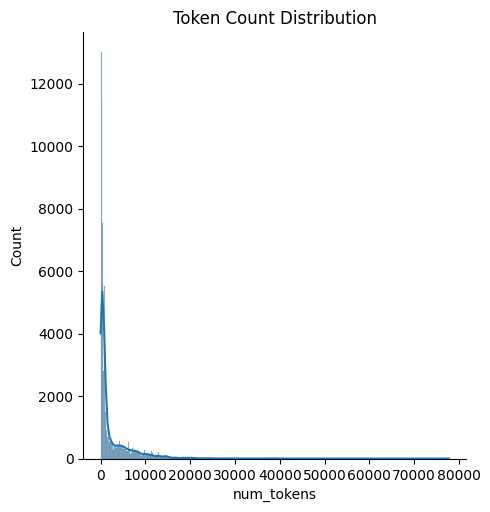

In [9]:
sns.displot(
    df['num_tokens'],
    kde=True
)
plt.title('Token Count Distribution')
plt.show()

In [10]:
num_tokens_cum_dist = (df.groupby('num_tokens').size() / len(df)).cumsum()

In [11]:
min_tokens = 50 # test out different values
print("""
Setting the minimum number of tokens at {0} would remove {1}% of the samples. 
""".format(min_tokens, round(100 * num_tokens_cum_dist[min_tokens], 2)))


Setting the minimum number of tokens at 50 would remove 2.19% of the samples. 

